<div style="  background: linear-gradient(145deg, #0f172a, #1e293b);  border: 4px solid transparent;  border-radius: 14px;  padding: 18px 22px;  margin: 12px 0;  font-size: 26px;  font-weight: 600;  color: #f8fafc;  box-shadow: 0 6px 14px rgba(0,0,0,0.25);  background-clip: padding-box;  position: relative;">  <div style="    position: absolute;    inset: 0;    padding: 4px;    border-radius: 14px;    background: linear-gradient(90deg, #06b6d4, #3b82f6, #8b5cf6);    -webkit-mask:       linear-gradient(#fff 0 0) content-box,       linear-gradient(#fff 0 0);    -webkit-mask-composite: xor;    mask-composite: exclude;    pointer-events: none;  "></div>    <b>Keras Input and Dense Layers</b>    <br/>  <span style="color:#9ca3af; font-size: 18px; font-weight: 400;">(Advanced Deep Learning with Keras)</span></div>


## Table of Contents
1. [Inputs and Outputs](#section-1)
2. [Keras Models](#section-2)
3. [Fit and Evaluate a Model](#section-3)
4. [Conclusion](#section-4)

---

<br><span style="  display: inline-block;  color: #fff;  background: linear-gradient(135deg, #a31616ff, #02b7ffff);  padding: 12px 20px;  border-radius: 12px;  font-size: 28px;  font-weight: 700;  box-shadow: 0 4px 12px rgba(0,0,0,0.2);  transition: transform 0.2s ease, box-shadow 0.2s ease;">  🧾 1. INPUTS AND OUTPUTS</span><br>

### Sequential API vs Functional API

| Sequential         | Functional                  |
| ------------------ | --------------------------- |
| Simple layer stack | Graph-based model           |
| One input/output   | Multiple inputs/outputs     |
| Beginner-friendly  | Production & research-ready |

<br><span style="  display: inline-block;  color: #fff;  background: linear-gradient(135deg, #16a374ff, #2802ffff);  padding: 12px 20px;  border-radius: 12px;  font-size: 18px;  font-weight: 700;  box-shadow: 0 4px 12px rgba(0,0,0,0.2);  transition: transform 0.2s ease, box-shadow 0.2s ease;">Sequential API</span><br>

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Generate dummy data
X = np.random.rand(200, 10)
y = np.random.randint(0, 2, size=(200, 1))

# Build seq_model
seq_model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile seq_model
seq_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train seq_model
seq_model.fit(
    X,
    y,
    epochs=10,
    batch_size=16,
    validation_split=0.2
)

# Evaluate
loss, acc = seq_model.evaluate(X, y)
print(f"Sequential Model Accuracy: {acc:.4f}")


e:\001_Github_Repo_all\applied-deep-learning-keras\.venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):
e:\001_Github_Repo_all\applied-deep-learning-keras\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.5375 - loss: 0.6892 - val_accuracy: 0.4750 - val_loss: 0.7084
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5562 - loss: 0.6845 - val_accuracy: 0.5000 - val_loss: 0.7081
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5562 - loss: 0.6807 - val_accuracy: 0.4750 - val_loss: 0.7108
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5750 - loss: 0.6780 - val_accuracy: 0.4750 - val_loss: 0.7118
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5688 - loss: 0.6753 - val_accuracy: 0.4250 - val_loss: 0.7147
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5875 - loss: 0.6725 - val_accuracy: 0.4500 - val_loss: 0.7175
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6125 - loss: 0.6705 - val_accuracy: 0.4500 - val_loss: 0.7212
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5813 - loss: 0.6687 - val_accuracy: 0.4000 - val

In [3]:
seq_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,693 (10.52 KB)

 Trainable params: 897 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,796 (7.02 KB)

<br><span style="  display: inline-block;  color: #fff;  background: linear-gradient(135deg, #16a374ff, #2802ffff);  padding: 12px 20px;  border-radius: 12px;  font-size: 18px;  font-weight: 700;  box-shadow: 0 4px 12px rgba(0,0,0,0.2);  transition: transform 0.2s ease, box-shadow 0.2s ease;">Functional API</span><br>

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Generate dummy data
X = np.random.rand(200, 10)
y = np.random.randint(0, 2, size=(200, 1))

# Define input
inputs = Input(shape=(10,))

# Define layers
x = Dense(32, activation='relu')(inputs)
x = Dense(16, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)

# Build func_model
func_model = Model(inputs=inputs, outputs=outputs)

# Compile func_model
func_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train func_model
func_model.fit(
    X,
    y,
    epochs=10,
    batch_size=16,
    validation_split=0.2
)

# Evaluate
loss, acc = func_model.evaluate(X, y)
print(f"Functional Model Accuracy: {acc:.4f}")

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.4688 - loss: 0.7024 - val_accuracy: 0.3500 - val_loss: 0.7189
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4812 - loss: 0.6981 - val_accuracy: 0.3250 - val_loss: 0.7123
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5063 - loss: 0.6956 - val_accuracy: 0.3750 - val_loss: 0.7048
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5000 - loss: 0.6945 - val_accuracy: 0.4750 - val_loss: 0.6985
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5063 - loss: 0.6924 - val_accuracy: 0.4250 - val_loss: 0.6979
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5063 - loss: 0.6907 - val_accuracy: 0.5250 - val_loss: 0.6956
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5312 - loss: 0.6898 - val_accuracy: 0.4750 - val_loss: 0.6955
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5250 - loss: 0.6893 - val_accuracy: 0.5250 - val_loss

In [5]:
func_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,693 (10.52 KB)

 Trainable params: 897 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,796 (7.02 KB)

### Fundamental Parts
The Keras Functional API is built on two fundamental parts:
1.  **Input Layer**: Defines the shape of the data entering the model.
2.  **Output Layer**: Defines the prediction output.

### Defining Inputs
To create an input, we import `Input` from `tensorflow.keras.layers`. The `shape` argument specifies the dimensions of the input data (excluding the batch size).

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Input

# Create an input tensor
# shape=(1,) indicates a single number input (1D vector of length 1)
input_tensor = Input(shape=(1,))

# Print the tensor object to see its properties
print(input_tensor)

<KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=keras_tensor_8>



### Defining Outputs
Outputs are typically Dense layers. A Dense layer is a standard fully connected layer.


In [7]:
from tensorflow.keras.layers import Dense

# Create a Dense layer with 1 unit (neuron)
output_layer = Dense(1)

# Print the layer object
print(output_layer)

<Dense name=dense_6, built=False>



### Connecting Inputs to Outputs
The unique feature of the Functional API is how layers are connected. You treat a layer as a function and pass the tensor from the previous layer into it.

**Logic:** `output_tensor = layer_function(input_tensor)`


In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense

# 1. Define Input
input_tensor = Input(shape=(1,))

# 2. Define Layer
output_layer = Dense(1)

# 3. Connect Layer to Input to get Output Tensor
output_tensor = output_layer(input_tensor)

# The result is a KerasTensor, now carrying the history of the computation graph
print(output_tensor)

<KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=keras_tensor_10>



---

<br><span style="  display: inline-block;  color: #fff;  background: linear-gradient(135deg, #a31616ff, #02b7ffff);  padding: 12px 20px;  border-radius: 12px;  font-size: 28px;  font-weight: 700;  box-shadow: 0 4px 12px rgba(0,0,0,0.2);  transition: transform 0.2s ease, box-shadow 0.2s ease;">  🧾 2. KERAS MODELS</span><br>



### Creating the Model
Once you have an input tensor and an output tensor, you can wrap them into a `Model` object. This object is used for training (fitting) and evaluation.


In [9]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

input_tensor = Input(shape=(1,))
output_tensor = Dense(1)(input_tensor)

model = Model(input_tensor, output_tensor)


### Compiling the Model
Before training, the model must be compiled with an optimizer and a loss function.
*   **Optimizer**: Determines how weights are updated (e.g., 'adam').
*   **Loss**: The metric to minimize (e.g., 'mae' for Mean Absolute Error).

**Original Code (from slides):**


In [10]:
model.compile(optimizer='adam', loss='mae')


### Summarizing the Model
`model.summary()` provides a text description of the model architecture, including parameter counts.

**Original Code (from slides):**


In [11]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)


### Plotting the Model
Keras provides utilities to visualize the model graph.


[graphviz-downlode](https://graphviz.org/)

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input-Layer (InputLayer)        │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Predicted-Score-Diff (Dense)    │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

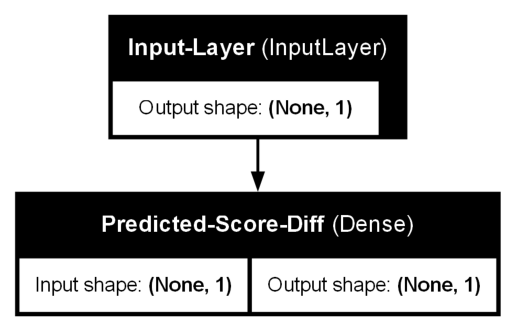

In [12]:
from keras import Model, Input
from keras.layers import Dense
from keras.utils import plot_model
import matplotlib.pyplot as plt

# 1. Define input
input_tensor = Input(shape=(1,), name="Input-Layer")

# 2. Define output
output_tensor = Dense(1, name="Predicted-Score-Diff")(input_tensor)

# 3. Build model
model = Model(inputs=input_tensor, outputs=output_tensor)

# 4. Compile model
model.compile(optimizer="adam", loss="mae")

# 5. Model summary
model.summary()

# 6. Plot model
plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

# 7. Display model image
img = plt.imread("model.png")
plt.imshow(img)
plt.axis("off")
plt.show()

---

<br><span style="  display: inline-block;  color: #fff;  background: linear-gradient(135deg, #a31616ff, #02b7ffff);  padding: 12px 20px;  border-radius: 12px;  font-size: 28px;  font-weight: 700;  box-shadow: 0 4px 12px rgba(0,0,0,0.2);  transition: transform 0.2s ease, box-shadow 0.2s ease;">  🧾 3. FIT AND EVALUATE A MODEL</span><br>

### Goal: Predict Tournament Outcomes
We will use the basketball tournament data to predict the outcome of games.

*   **Input**: Seed Difference (Team 1 Seed - Team 2 Seed).
    *   Range: -15 to +15.
    *   Example: If Team 1 is Seed 16 and Team 2 is Seed 1, Diff = 15.
*   **Output**: Score Difference (Team 1 Score - Team 2 Score).
    *   Range: Approx -50 to +50.

### Data Exploration
Before fitting, let's look at the relationship between seeds and scores.

In [13]:
import pandas as pd
import numpy as np
import os

# Load the datasets
DATA_DIR = '_datasets/basketball_data'
games_tourney = pd.read_csv(os.path.join(DATA_DIR, 'games_tourney.csv'))

print("\n--- Games Tourney Head ---")
print(games_tourney.head())


--- Games Tourney Head ---
   season  team_1  team_2  home  seed_diff  score_diff  score_1  score_2  won
0    1985     288      73     0         -3          -9       41       50    0
1    1985    5929      73     0          4           6       61       55    1
2    1985    9884      73     0          5          -4       59       63    0
3    1985      73     288     0          3           9       50       41    1
4    1985    3920     410     0          1          -9       54       63    0


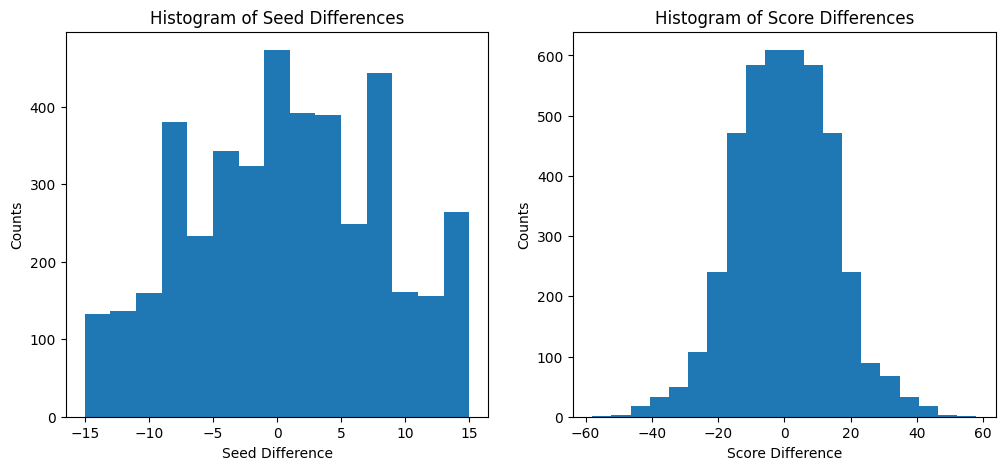

In [14]:
import matplotlib.pyplot as plt

# Using the synthetic games_tourney data created in Section 1

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Histogram of Seed Differences
ax[0].hist(games_tourney['seed_diff'], bins=15)
ax[0].set_title('Histogram of Seed Differences')
ax[0].set_xlabel('Seed Difference')
ax[0].set_ylabel('Counts')

# Histogram of Score Differences
ax[1].hist(games_tourney['score_diff'], bins=20)
ax[1].set_title('Histogram of Score Differences')
ax[1].set_xlabel('Score Difference')
ax[1].set_ylabel('Counts')

plt.show()


### Building the Specific Model
We build a simple regression model with 1 input (seed diff) and 1 output (score diff).

In [15]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# 1. Define the Input
input_tensor = Input(shape=(1,))

# 2. Add Hidden Layers
# The first hidden layer
x = Dense(64, activation='relu')(input_tensor)
x = Dense(32, activation='relu')(x)
x = Dense(16, activation='relu')(x)

# 3. Define the Output
# Connect the final hidden layer 'x' to the output layer
output_tensor = Dense(1)(x)


model = Model(input_tensor, output_tensor)
model.compile(optimizer='adam', loss='mae')

model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)


### Fitting the Model
We train the model using `model.fit()`.

*   **batch_size**: 64
*   **validation_split**: 0.20 (20% of data used for validation)

In [16]:
X = games_tourney['seed_diff']  # Features
y = games_tourney['score_diff'] # Target

# Fitting the model and capturing history
history = model.fit(
    X, y,
    batch_size=64,
    validation_split=0.20,
    verbose=0,
    epochs=100
    )

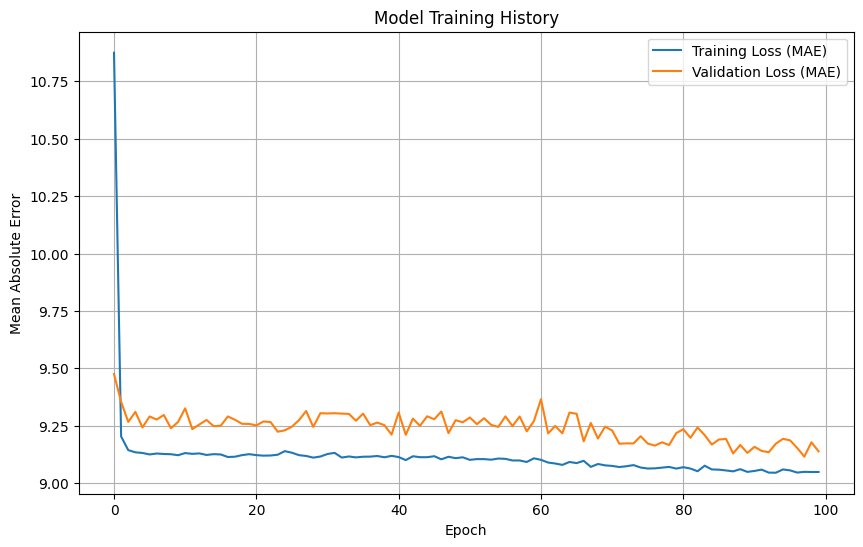

In [17]:
# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss (MAE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MAE)')
plt.title('Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.show()


### Evaluating the Model
Finally, we evaluate the model on a test set (or the same set if no separate test set is defined in the slides). The slides show evaluation on `games_test`. We will split our data to mimic this.


--- Model Evaluation ---
Test Set Loss (MAE): 9.1411
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Mean Absolute Error: 9.1410
Mean Squared Error: 132.9881


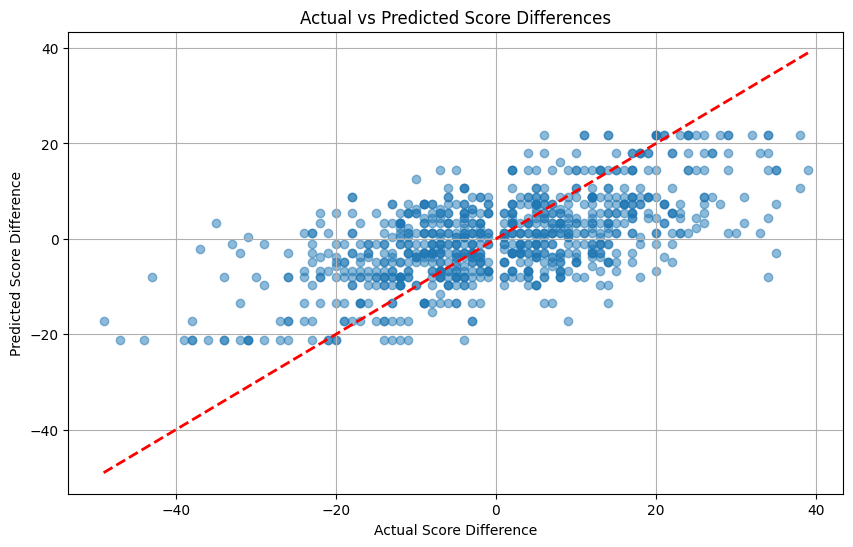

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Create a test set
X_train, X_test, y_train, y_test = train_test_split(
    games_tourney['seed_diff'], 
    games_tourney['score_diff'], 
    test_size=0.2, 
    random_state=42
)

# Evaluate
print("\n--- Model Evaluation ---")
loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Set Loss (MAE): {loss:.4f}")

# Predictions
y_pred = model.predict(X_test)

# Calculate metrics explicitly
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# Visual Evaluation
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Score Difference')
plt.ylabel('Predicted Score Difference')
plt.title('Actual vs Predicted Score Differences')
plt.grid(True)
plt.show()

---

<br><span style="  display: inline-block;  color: #fff;  background: linear-gradient(135deg, #a31616ff, #02b7ffff);  padding: 12px 20px;  border-radius: 12px;  font-size: 28px;  font-weight: 700;  box-shadow: 0 4px 12px rgba(0,0,0,0.2);  transition: transform 0.2s ease, box-shadow 0.2s ease;">  🧾 4. CONCLUSION</span><br>

### Summary
In this notebook, we successfully refreshed the core concepts of the **Keras Functional API**:

1.  **Inputs**: Defined using `Input(shape=(...))`.
2.  **Layers**: Defined using standard layers like `Dense`.
3.  **Connections**: Made by calling layers as functions: `next_layer(previous_layer)`.
4.  **Models**: Instantiated using `Model(inputs, outputs)`.
5.  **Workflow**: The standard Deep Learning workflow involves:
    *   Defining architecture.
    *   Compiling with an optimizer and loss function.
    *   Fitting to training data.
    *   Evaluating on test data.

### Next Steps
This foundation prepares us for more complex architectures covered in the subsequent chapters of the course, including:
*   **Models with 2 inputs**: Combining multiple data sources.
*   **Models with 3 inputs**: Handling even more complex data streams.
*   **Multiple outputs**: Predicting multiple targets simultaneously (e.g., predicting both the score difference *and* the winner).
